## 🌍 World Happiness Report 2019 – Datarening


In [8]:
#Ladda in och visa grunddata

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Allt är installerat och fungerar! 😎")


# Läs in filen (ersätt med rätt namn om det är annorlunda)
df = pd.read_csv("data/2019.csv")

# Visa de första raderna
df.head()

Allt är installerat och fungerar! 😎


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 🔍 Grundläggande info om datan

In [9]:
## Datalängd, dtypes, NaN-kontroll

# Översikt
df.info()

# Kontrollera saknade värden
missing_vals = df.isna().sum()
print("Saknade värden per kolumn:")
print(missing_vals[missing_vals > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
Saknade värden per kolumn:
Series([], dtype: int64)


## 📌 Cell 5 – Byt kolumnnamn för tydlighet
För att förenkla analysen och kodningen byter vi långa kolumnnamn till kortare, mer praktiska namn.

In [10]:
## 💻 Kodcell – Byt kolumnnamn:

df = df.rename(columns={
    'Country or region': 'Country',
    'Score': 'Happiness',
    'GDP per capita': 'GDP',
    'Social support': 'SocialSupport',
    'Healthy life expectancy': 'Health',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Corruption',
    'Dystopia Residual': 'DystopiaResidual',
    'Overall rank': 'Rank'
})

## 📌 Cell 6 – Ta bort onödiga kolumner (t.ex. 'Whisker.low', 'Whisker.high')
Vi fokuserar på huvudvariablerna. Dessa kolumner används inte för analys och tas bort.

In [11]:
# Kontrollera vilka kolumner du har först
df.columns
# (Om det finns Whisker.low och Whisker.high, kör då detta:)
df = df.drop(columns=['Whisker.high', 'Whisker.low'], errors='ignore')

## 📌 Cell 7 – Kontroll av dubbletter
Vi kontrollerar om det finns rader med exakt samma värden och tar bort dem.

In [12]:
print("Antal dubbletter:", df.duplicated().sum())
df = df.drop_duplicates()

Antal dubbletter: 0


 ## 📌 Cell 8 – Saknade värden
Vi kontrollerar vilka rader som saknar värden i någon av huvudkolumnerna och tar bort dem.

In [13]:
# Visa hur många som saknar värde i varje kolumn
print("Saknade värden per kolumn:\n", df.isna().sum())

# Ta bort rader med någon NaN
df = df.dropna()

Saknade värden per kolumn:
 Rank             0
Country          0
Happiness        0
GDP              0
SocialSupport    0
Health           0
Freedom          0
Generosity       0
Corruption       0
dtype: int64


# 📌 Cell 9  – Outlier-analys

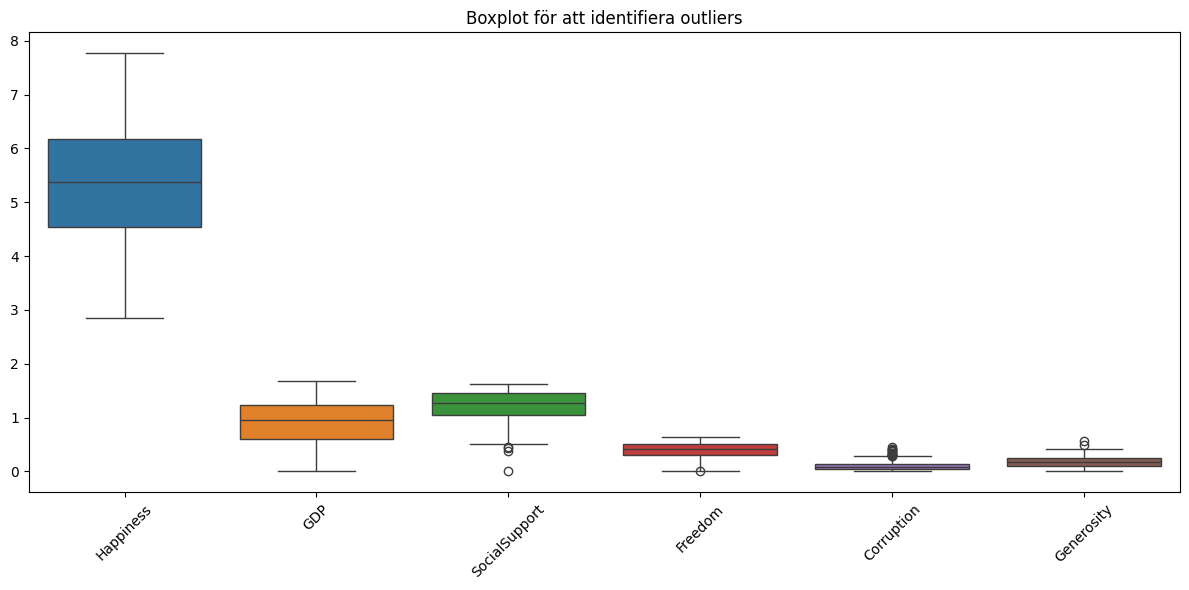

In [14]:
# 📦 Vi använder seaborn för att plotta boxplots och identifiera potentiella outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Happiness', 'GDP', 'SocialSupport', 'Freedom', 'Corruption', 'Generosity']])
plt.title('Boxplot för att identifiera outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🧠 Notering om outliers

Vi har i denna analys valt att **inte ta bort outliers**, och det är ett medvetet beslut baserat på projektets syfte:

- Datasetet representerar **världens alla länder**, där extrema värden (t.ex. högt BNP eller låg förväntad livslängd) inte är felaktiga – utan **viktiga faktorer som speglar verkliga globala skillnader**.
- Vissa länder sticker ut – t.ex. *Luxemburg* med mycket hög BNP per capita, eller *Zimbabwe* med låg förväntad livslängd – men dessa outliers **tillför värdefull kontext** och **bidrar till analysens bredd**.
- Eftersom vårt mål inte är att bygga en exakt prediktionsmodell, utan att **förstå mönster och samband**, så har vi valt att **behålla hela variationen i datan**.
- Outliers hjälper oss att identifiera **intressanta avvikelser** och **skapa diskussion** i vår presentation.

✨ Sammanfattningsvis: outliers i detta dataset är inte brus – de är en del av berättelsen.

## 📌 Cell 10 – Spara renad data
Vi sparar en kopia av den renade datan till mappen `data/` så andra i gruppen kan använda den.

In [15]:
# Skapa mappen "data" om den inte finns
import os
os.makedirs("data", exist_ok=True)

# Spara CSV
df.to_csv("data/happiness_2019_cleaned.csv", index=False)

print("✅ Renad data sparad som 'data/happiness_2019_cleaned.csv'")

✅ Renad data sparad som 'data/happiness_2019_cleaned.csv'
